# Tackle Noise Error Correction 
------------

In [1]:
from qiskit import transpile, QuantumCircuit
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, ReadoutError
from qiskit.visualization import plot_histogram

In [2]:
# Define the quantum circuit
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# Transpile the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

In [3]:
# Define and apply noise model
noise_model = NoiseModel()
readout_error = ReadoutError([[0.9, 0.1], [0.1, 0.9]])
for qubit in range(3):
    noise_model.add_readout_error(readout_error, [qubit])

# Run the noisy simulation
job = backend.run(transpiled_qc, shots=1000, noise_model=noise_model)
result = job.result()
counts = result.get_counts()

In [4]:
# Function to apply a correction matrix to counts (simplified)
def apply_correction(counts, correction_matrix):
    # Get the sorted list of keys
    sorted_keys = sorted(counts.keys())

    # Initialize corrected counts dictionary
    corrected_counts = {key: 0 for key in sorted_keys}

    # Calculate corrected counts using basic Python operations
    for i, key in enumerate(sorted_keys):
        for j, corrected_key in enumerate(sorted_keys):
            if correction_matrix[i][j] != 0:
                corrected_counts[corrected_key] += counts.get(key, 0) * correction_matrix[i][j]

    return corrected_counts

Original Counts: {'110': 48, '001': 42, '100': 40, '111': 375, '011': 35, '010': 43, '000': 368, '101': 49}
Mitigated Counts: {'000': 368, '001': 42, '010': 43, '011': 35, '100': 40, '101': 49, '110': 48, '111': 375}


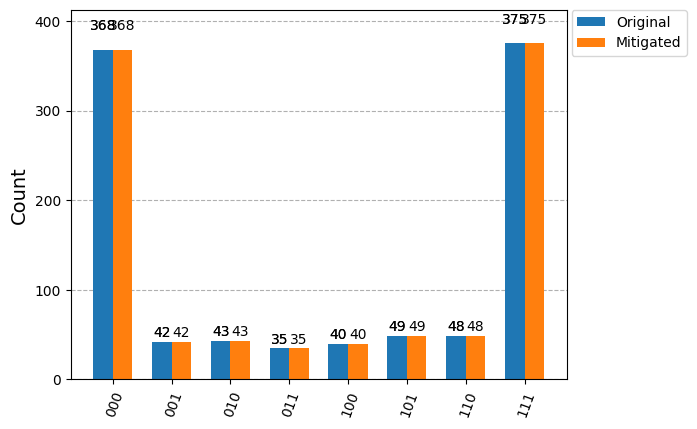

In [5]:
# Example correction matrix (identity matrix for simplicity)
correction_matrix = [[1 if i == j else 0 for j in range(len(counts.keys()))] for i in range(len(counts.keys()))]

# Apply correction matrix
mitigated_counts = apply_correction(counts, correction_matrix)

# Print the original counts
print(f"Original Counts: {counts}")

# Print the mitigated counts
print(f"Mitigated Counts: {mitigated_counts}")

# Plot the histograms of the original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])